# Support Vector Machine

## Dependency

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)

## Concept

In **binary classification**, where **y** is labeled **0 for negative** and **1 for positive**, **optimization objective** of SVM is the following.

$$
\underset{\theta}{\min} C \sum_{i = 1}^{n} \left[ y^{(i)} cost_1 (\theta^T x^{(i)}) + (1 - y^{(i)}) cost_0 (\theta^T x^{(i)})  + \frac{1}{2} \sum_{i = 1}^{p} \theta_j^2 \right]
$$

- $cost_1(\theta^T x^)$ is a cost function when $y = 1$. When $\theta^T x \ge 1$  (not just $\ge$ 0), cost is 0. When $\theta^T x \le 1$, cost linearly increases as $\theta^T x$ gets smaller.
- $cost_0(\theta^T x^)$ is a cost function when $y = 0$. When $\theta^T x \le -1$  (not just $\le$ 0), cost is 0. When $\theta^T x \ge -1$, cost linearly increases as $\theta^T x$ gets larger.

$$
C = \frac{1}{\lambda}
$$


Cost function of logistic regression that we wanna minimize. $n$ is the number of data. $p$ is the number of features.

$$
\underset{\theta}{\min} \frac{1}{n} \left[ \sum_{i = 1}^{n} y^{(i)} \left(- \log h_{\theta} (x^{(i)}) \right) + (1 - y^{(i)}) \left( - \log (1 - h_{\theta} (x^{(i)})) \right) \right] + \frac{\lambda}{2n} \sum_{j = 1}^{p} \theta_j^2
$$

$h_{\theta}(x)$ is the below sigmoid function used in logistic regression.

$$
h_{\theta}(x) = \frac {1} {1 + e^{-\theta^T x}}
$$

- When $y = 1$, we want $h_{\theta}(x) \approx 1$ ($h_{\theta}(x)$ to be close to $1$), we want $e^{-\theta^T x}$ small, we want $\theta^T x \gg 0$ ($\theta^T x$ is much larger than 0).
- When $y = 0$, we want $h_{\theta}(x) \approx 0$ ($h_{\theta}(x)$ to be close to $0$), we want $e^{-\theta^T x}$ large, we want $\theta^T x \ll 0$ ($\theta^T x$ is much smaller than 0).

### Kernel

Linear kernel and Gaussian kernel are the popular choice for kernel.

**Linear kernel** means just saying the model doesn't use a kernel. It's just use linear combination $\theta^T x$ instead of $\theta^T f$. It gives us a standard linear classifier. When $p$ number of features is large, and $n$ number of data is small, maybe it's a good idea to implement a simple model by linear kernel, instead of making SVM complicated, because you don't have enough data. It could have overfitting.

**Gaussian kernel (Radial basis function, RBF)** . When $p$ the number of features is small and $n$ the number of data is large. When data is big, we can use kernel to make SVM complex to have a better accuracy. Do perform feature scaling before using this kernel, because Gaussian kernel compute squares for each features and the final summed squared will be dominated by large unit features. 

### Bias Variance Tradeoff

Bias variance tradeoff of SVM is controlled by $C$ and Kernel parameter.

- When $C$ is large, low bias and high variance (overfit)

Because $C$ acts like $\frac{1}{\lambda}$, large $C$ means small regularization parameter $\lambda$, so overfit.

Kernel is more smooth, it won't produce much different amount data after applying kernel
Higher bias, but lower variance.

### SVM vs. Logistic Regression

Let $p$ be the number of features, $n$ be the number of data.

- When $p$ is large relative to $n$, use logistic regression or SVM with linear kernel (SVM without a kernel)
- When $p$ is small and $n$ is intermediate, use SVM with Gaussian kernel
- When $p$ is small and $n$ is large, making more features and use logistic regression or SVM with linear kernel. 
  - People might argue that when data is large, Gaussian kernel computation could be slow. In that case, you can use SVM without a kernel (linear kernel) instead.
  - Making more features is the idea that you wanna use simple linear model but try to improve accuracy by feature engineering
  
Logistic regression and SVM with a linear kernel (no kernel) should be producing a similar result, but the benefit of SVM is to allow us to use kernel to make it a nonlinear classifier.



**Nonseparable case** means because the classes overlap, the classes may not be separable by a linear boundary.

**Hyperplane**

**Support vectors** are the data points which are nearest to the hyperplane. If they are removed, the position of hyperplane is changed.



In [62]:
# from math behind large margin classification

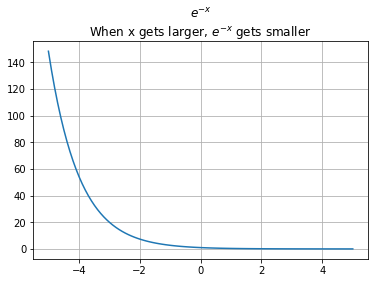

In [15]:
x = np.linspace(-5, 5, 100)
plt.plot(x, np.exp(-x))
plt.title('$e^{-x}$\nWhen x gets larger, $e^{-x}$ gets smaller')
plt.grid()
plt.show()

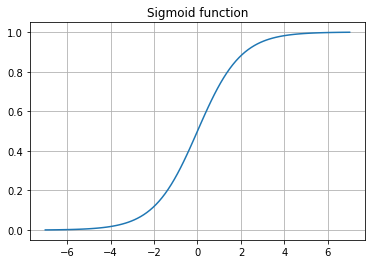

In [26]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-7, 7, 100)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid function')
plt.grid()
plt.show()

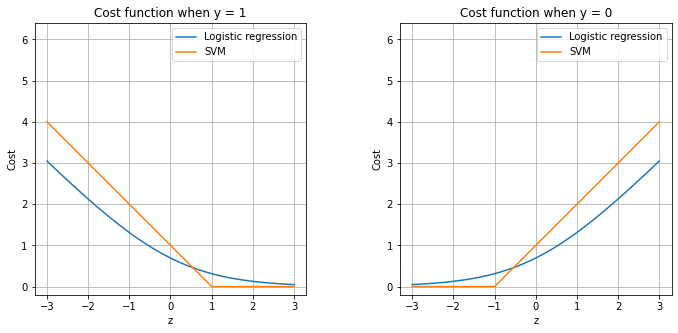

In [61]:
def sigmoid_y_1(z):
    return - np.log(1 / (1 + np.exp(-z)))


def sigmoid_y_0(z):
    return - np.log(1 - 1 / (1 + np.exp(-z)))


def svm_y_1(z):
    return np.where(z >= 1, 0, -z + 1)
#     return np.where(z >= 0, 0, -z)


def svm_y_0(z):
    return np.where(z <= -1, 0, z + 1)


plt.figure(figsize=(12, 5))

plt.subplot(121)
z = np.linspace(-3, 3, 100)
plt.plot(z, sigmoid_y_1(z), label='Logistic regression')
plt.plot(z, svm_y_1(z), label='SVM')
plt.title('Cost function when y = 1')
plt.xlabel('z')
plt.ylabel('Cost')
plt.legend()
plt.grid()
plt.axis('square')

plt.subplot(122)
z = np.linspace(-3, 3, 100)
plt.plot(z, sigmoid_y_0(z), label='Logistic regression')
plt.plot(z, svm_y_0(z), label='SVM')
plt.title('Cost function when y = 0')
plt.xlabel('z')
plt.ylabel('Cost')
plt.legend()
plt.grid()
plt.axis('square')

plt.show()

## Parameter

In [37]:
CSV_01 = '../data/breast_cancer_wisconsin_diagnostic.csv'
target_to_class = {
    0: 'Malignant',
    1: 'Benign'
}
TEST_SIZE = 0.3
RANDOM_STATE = 109

## Get data

In [27]:
# cancer = datasets.load_breast_cancer()
# df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
# df.insert(loc=0, column='target', value=cancer.target)
# df.to_csv(CSV_01, index=False)

In [28]:
df = pd.read_csv(CSV_01)

In [29]:
print(df.shape)

(569, 31)


In [30]:
df.head()

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
df.tail()

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,1,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [36]:
counter = Counter(df['target'])
for k, v in counter.items():
    print(f'Class: {target_to_class[k]}, proportion: {v / len(df):.1%}')

Class: Malignant, proportion: 37.3%
Class: Benign, proportion: 62.7%


## Split data

In [39]:
df_tmp = df.copy()
y = df_tmp.pop('target')
X = df_tmp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [40]:
print(f'Train, {X_train.shape}, {y_train.shape}')
print(f'Test, {X_test.shape}, {y_test.shape}')

Train, (398, 30), (398,)
Test, (171, 30), (171,)


## Train model

In [42]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

## Evaluate model

In [47]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [49]:
print(f'Accuracy: {accuracy:.1%}, precision: {precision:.1%}, recall: {recall:.1%}')

Accuracy: 96.5%, precision: 98.1%, recall: 96.3%


## Reference
- [Support Vector Machines with Scikit-learn](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python)
- ELS, Chapter 12, Support Vector Machines and Flexible Discriminants
- [Radial Basis Function (RBF) Kernel: The Go-To Kernel](https://towardsdatascience.com/radial-basis-function-rbf-kernel-the-go-to-kernel-acf0d22c798a)